# DEL 1 - Läs in bibliotek och data
Först behöver vi importera olika bibliotek, tex pandas och funktioner som vi skapat i de olika mapparna

Sen behöver vi läsa in och städa datan. Filen är snygg som den är, vi har inga NaN-värden eller dubletter och kategorinamnen ser bra ut.
Det vi behöver fixa är --> datatyperna

In [ ]:
"""Importerar bibliotek och funktioner."""

import pandas as pd
import matplotlib.pyplot as plt
from src.io_utils import load_data, clean_data
from src.metrics import order_per_weekday
from src.metrics import order_per_month
from src.viz import plot_orders_weekday, plot_orders_month

In [ ]:
"""Skapa en variabel 'df_raw' där vi läser in filen med funktionen som vi skapat i 'io_utils"""

df_raw = load_data("data/ecommerce_sales.csv")

"""Skapa en ny variabe 'df' där vi sparar en 'städat' fil med en funktion vi skapat i 'io_utils ."""

df = clean_data(df_raw)

df['month'] = df['date'].dt.to_period('M')  # Tar ut månaden från datumet

df['day_of_week'] = df['date'].dt.day_name() # Tar ur veckodagen från datumet


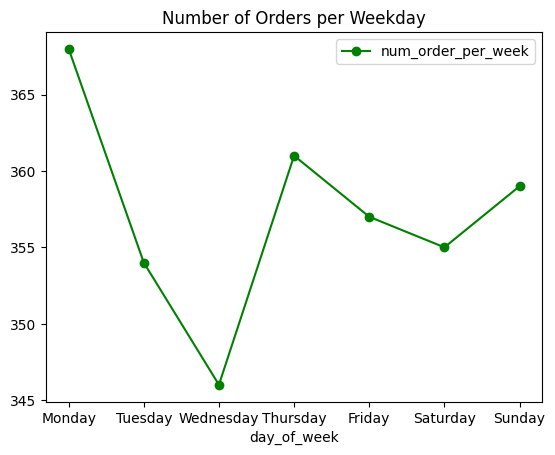

,day_of_week,num_order_per_week
1,Monday,368
5,Tuesday,354
6,Wednesday,346
4,Thursday,361
0,Friday,357
2,Saturday,355
3,Sunday,359


In [ ]:
# from src.metrics import order_per_month, order_per_weekday

plot_orders_weekday(df)
order_per_weekday(df)

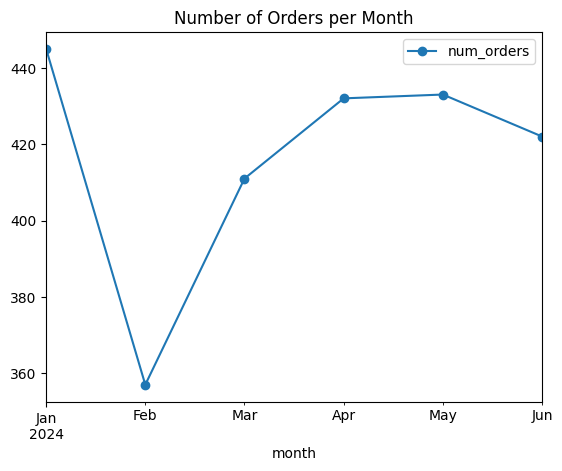

,month,num_orders
0,2024-01,445
1,2024-02,357
2,2024-03,411
3,2024-04,432
4,2024-05,433
5,2024-06,422


In [7]:
plot_orders_month(df)
order_per_month(df)

# DEL 2 - Presentera frågeställningar
- Vad säljer? - vilka kategorier driver mest intäkt?
- Var säljer vi? - vilka städer står för störst intäkt?
- När säljer vi? - finns tidsmönster/säsong i försäljningen?
- Hur ser en typisk order ut? - AOV (Average Order Value) och spridning.
- Topp-listor - topp-3 kategorier efter intäkt.
- Eventuella avvikelser - något oväntat mönster som sticker ut?
- Ni ska avsluta rapporten med 2-3 korta rekommendationer (punktlista) baserat på era resultat, 
- t.ex. “Satsa på kategori X i stad Y under månad Z

# Bakgrund och nyckeltal
I vår rapport har vi analyserat e-handlen i 5 olika städer. 
Nedan presneteras en snabb sammanfattning av nyckeltal.

In [8]:
"""Skapa en variabel 'analyser' och läs in nyckeltal med hjälp av en klass som vi skapat i ecommerce"""

"""Förslag på nyckeltal:
- Antal ordrar
- Total antal enheter
- Medelordervärde (AVO)
- Total intäkt"""

'Förslag på nyckeltal:\n- Antal ordrar\n- Total antal enheter\n- Medelordervärde (AVO)\n- Total intäkt'

# Vad säljer vi
Diagrammen visar vilka kategorier som driver mest intäkt samt AOV per kategori

In [9]:
"""Läs in diagram från viz.py som visar revenue per kategori"""

'Läs in diagram från viz.py som visar revenue per kategori'

In [10]:
"""Läs in diagram från viz.py som visa AOV per kategori"""

'Läs in diagram från viz.py som visa AOV per kategori'

# Var säljer vi
Diagrammen visar vilka städer som driver mest intäkt samt AOV per stad

In [11]:
"""Läs in diagram från viz.py som visar revenue per stad"""

'Läs in diagram från viz.py som visar revenue per stad'

In [12]:
"""Läs in diagram från viz.py som visar AOV per stad"""

'Läs in diagram från viz.py som visar AOV per stad'

# När säljer vi
Diagrammet visar intäkt per månad via tidsaxel

In [13]:
"""Läs in diagram från viz.py som visar intäkt per månad"""

'Läs in diagram från viz.py som visar intäkt per månad'

# Topplistor 
Visa top 3 kategorier sorterat på intäkt

# Avvikelser
Här får vi se vad vi lägger in när vi tagit ut olika data

# Rekomendatioen
Här lägger vi in våra rekomendtioner när vi analyserat datan